# RealState Price Prediction

In [1]:
import sklearn

In [2]:
import pandas as pd

In [3]:
housing = pd.read_csv("houseData.csv")

In [4]:
housing.head()

,CRIM,ZN,INDUUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUUS   506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [6]:
housing['CHAS'].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

In [7]:
housing.describe()

,CRIM,ZN,INDUUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [8]:
#for ploting histogram
# import matplotlib.pyplot as plt
# housing.hist(bins=50,figsize=(20,15))

# Train Test Data Spliting

In [9]:
#This function is a available in the sklearn package it is implemented for learning
import numpy as np
def split_train_test_data(data,test_ratio):
    np.random.seed(42)
    shuffled= np.random.permutation(len(data))
    test_set_size=int(len(data)*test_ratio)
    test_indices = shuffled[:test_set_size]
    train_indices = shuffled[test_set_size:]
    return data.iloc[train_indices],data.iloc[test_indices]

In [10]:
train_set,test_set = split_train_test_data(housing,0.2)

In [11]:
print(len(test_set))

101


In [12]:
from sklearn.model_selection import train_test_split

In [13]:
train_set , test_set = train_test_split(housing,test_size= 0.20 , random_state = 42)

In [14]:
print(len(test_set))

102


In [15]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits = 2 , test_size = 0.2 , random_state =42 )
for train_index , test_index in split.split(housing,housing['CHAS']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [16]:
strat_test_set.describe()

,CRIM,ZN,INDUUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000
mean,3.602448,9.397059,11.822941,0.068627,0.562687,6.225500,70.545098,3.840628,10.068627,422.421569,18.772549,358.470392,12.990784,21.550980
std,7.420561,22.159786,6.895261,0.254068,0.118315,0.571879,26.513115,2.087184,8.937915,168.700534,1.925656,88.910526,6.791312,8.616284
min,0.006320,0.000000,1.250000,0.000000,0.394000,4.906000,2.900000,1.129600,1.000000,188.000000,14.700000,2.600000,1.730000,6.300000
25%,0.095962,0.000000,5.885000,0.000000,0.453000,5.884000,51.325000,2.179375,4.000000,287.500000,17.650000,377.780000,8.020000,17.125000
50%,0.249390,0.000000,9.900000,0.000000,0.538000,6.138500,78.500000,3.386950,5.000000,368.000000,19.200000,391.385000,11.865000,20.250000
75%,4.220332,0.000000,18.100000,0.000000,0.624000,6.459750,93.225000,5.041000,24.000000,666.000000,20.200000,396.900000,16.945000,23.875000
max,51.135800,95.000000,27.740000,1.000000,0.871000,8.247000,100.000000,10.585700,24.000000,711.000000,22.000000,396.900000,34.770000,50.000000


In [17]:
housing = strat_train_set.copy()

# Looking for correlation

In [18]:
corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values(ascending = False)

MEDV       1.000000
RM         0.690513
ZN         0.345162
B          0.335772
DIS        0.245794
CHAS       0.154175
AGE       -0.358729
RAD       -0.386831
CRIM      -0.393238
NOX       -0.418736
TAX       -0.481958
INDUUS    -0.507258
PTRATIO   -0.517195
LSTAT     -0.740104
Name: MEDV, dtype: float64

array([[<AxesSubplot:xlabel='MEDV', ylabel='MEDV'>,
        <AxesSubplot:xlabel='RM', ylabel='MEDV'>,
        <AxesSubplot:xlabel='ZN', ylabel='MEDV'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='MEDV'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='RM'>,
        <AxesSubplot:xlabel='RM', ylabel='RM'>,
        <AxesSubplot:xlabel='ZN', ylabel='RM'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='RM'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='ZN'>,
        <AxesSubplot:xlabel='RM', ylabel='ZN'>,
        <AxesSubplot:xlabel='ZN', ylabel='ZN'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='ZN'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='RM', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='ZN', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

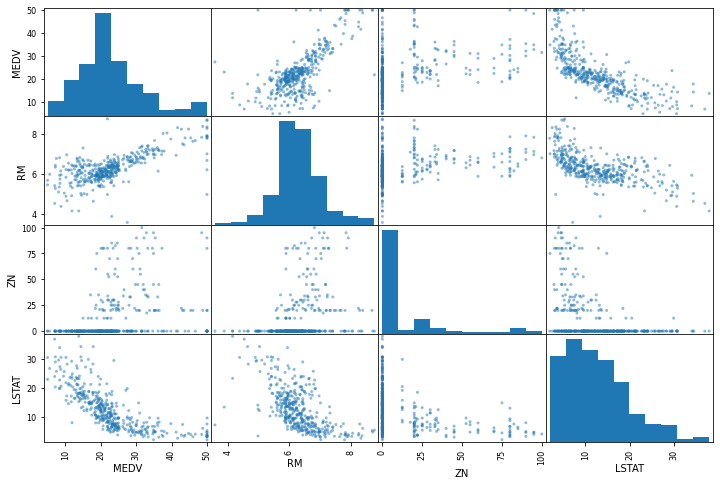

In [19]:
from pandas.plotting import scatter_matrix
attributes = ["MEDV","RM","ZN","LSTAT"]
scatter_matrix(housing[attributes],figsize=(12,8))

In [20]:
housing['ZN'].describe()

count    404.000000
mean      11.860149
std       23.607489
min        0.000000
25%        0.000000
50%        0.000000
75%       20.000000
max      100.000000
Name: ZN, dtype: float64

<AxesSubplot:xlabel='RM', ylabel='MEDV'>

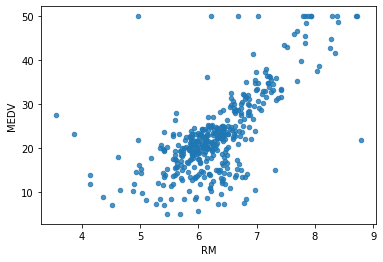

In [21]:
housing.plot(kind='scatter',x='RM',y='MEDV',alpha=0.8)

# Trying out Attribution combination

In [22]:
housing['TAXRM'] = housing['TAX'] / housing['RM']

In [23]:
housing.head()

,CRIM,ZN,INDUUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
89,0.05302,0.0,3.41,0,0.489,7.079,63.1,3.4145,2,270,17.8,396.06,5.70,28.7,38.140980
183,0.10008,0.0,2.46,0,0.488,6.563,95.6,2.8470,3,193,17.8,396.90,5.68,32.5,29.407283
191,0.06911,45.0,3.44,0,0.437,6.739,30.8,6.4798,5,398,15.2,389.71,4.69,30.5,59.059208
443,9.96654,0.0,18.10,0,0.740,6.485,100.0,1.9784,24,666,20.2,386.73,18.85,15.4,102.698535
92,0.04203,28.0,15.04,0,0.464,6.442,53.6,3.6659,4,270,18.2,395.01,8.16,22.9,41.912450


In [24]:
corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values(ascending = False)

MEDV       1.000000
RM         0.690513
ZN         0.345162
B          0.335772
DIS        0.245794
CHAS       0.154175
AGE       -0.358729
RAD       -0.386831
CRIM      -0.393238
NOX       -0.418736
TAX       -0.481958
INDUUS    -0.507258
PTRATIO   -0.517195
TAXRM     -0.545468
LSTAT     -0.740104
Name: MEDV, dtype: float64

<AxesSubplot:xlabel='TAXRM', ylabel='MEDV'>

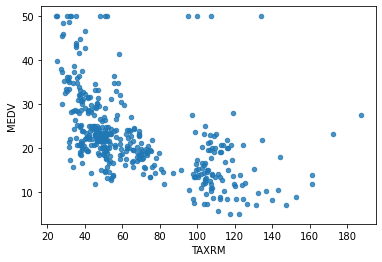

In [25]:
housing.plot(kind='scatter',x='TAXRM',y='MEDV',alpha=0.8)

# Missing Data handle

In [26]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy ='median')
imputer.fit(housing)
x = imputer.transform(housing)
housing_tr = pd.DataFrame(x,columns = housing.columns)
housing_tr.describe()

,CRIM,ZN,INDUUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.616320,11.860149,10.963540,0.069307,0.552677,6.299564,68.077475,3.783533,9.418317,404.655941,18.375495,356.220495,12.567797,22.780693,66.168128
std,8.883261,23.607489,6.849207,0.254290,0.115315,0.731811,28.557010,2.112777,8.654422,168.516025,2.216321,91.989648,7.232315,9.331883,31.730501
min,0.009060,0.000000,0.460000,0.000000,0.385000,3.561000,6.000000,1.137000,1.000000,187.000000,12.600000,0.320000,1.920000,5.000000,24.645639
25%,0.078832,0.000000,4.950000,0.000000,0.448750,5.886500,42.275000,2.077100,4.000000,277.000000,16.900000,374.335000,6.710000,16.950000,42.378799
50%,0.261390,0.000000,8.560000,0.000000,0.535000,6.229000,76.800000,3.167500,5.000000,329.000000,18.700000,391.605000,11.170000,21.600000,52.812661
75%,3.359357,20.000000,18.100000,0.000000,0.624000,6.661250,94.325000,5.218725,24.000000,666.000000,20.200000,395.810000,16.977500,26.425000,97.500306
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000,187.026116


# Scikit-learn Design